In [2]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# submitted a request for FIRMS data for the USA in .csv format here: https://firms2.modaps.eosdis.nasa.gov/download/

# reading in archived data for the dates 1/1/20 - 6/30/20
archives = pd.read_csv('./fire_archive_M6_9099.csv')

#reading in near real time data for the dates of 7/1/20 - 10/23/20
nrt = pd.read_csv('./fire_nrt_M6_9099.csv')

In [4]:
# looks like it has aqua fires and has day and night, don't want either so will filter out
archives.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   31.8349   -83.0561       306.7   1.4    1.2  2020-01-01       324   
1   36.3562   -76.8050       300.2   1.2    1.1  2020-01-01       325   
2   33.4178  -110.8616       321.5   1.0    1.0  2020-01-01       920   
3   41.4810   -90.8294       310.0   1.0    1.0  2020-01-01      1704   
4   38.6973   -90.1281       311.7   1.1    1.0  2020-01-01      1705   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          69     6.03       277.6  18.9        N     0  
1     Terra      MODIS          20     6.03       278.9  10.2        N     0  
2      Aqua      MODIS         100     6.03       271.8  24.9        N     2  
3     Terra      MODIS          69     6.03       276.5  13.8        D     0  
4     Terra      MODIS          54     6.03       282.3  14.1        D     2

In [5]:
archives.tail()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
43161   39.5017  -107.9083       328.1   1.5    1.2  2020-06-30      2042   
43162   39.5034  -107.8907       339.4   1.5    1.2  2020-06-30      2042   
43163   39.1804  -121.6288       322.7   2.2    1.4  2020-06-30      2042   
43164   39.4732  -112.1899       341.2   1.0    1.0  2020-06-30      2042   
43165   21.4930  -158.1153       330.7   1.0    1.0  2020-06-30      2355   

      satellite instrument  confidence  version  bright_t31   frp daynight  \
43161      Aqua      MODIS          80     6.03       311.4  26.5        D   
43162      Aqua      MODIS          89     6.03       310.9  55.5        D   
43163      Aqua      MODIS          37     6.03       306.9  28.6        D   
43164      Aqua      MODIS          88     6.03       313.4  27.8        D   
43165      Aqua      MODIS          72     6.03       307.3  20.9        D   

       type  
43161     0  
43162     0  
43163     0  
43164     0  
43165     0

In [6]:
# looks like it has aqua fires and has day and night, don't want either so will filter out after combining the data frames
nrt.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0    33.443    -88.760       305.7   1.7    1.3  2020-07-01       425   
1    36.780    -92.806       307.0   1.1    1.1  2020-07-01       425   
2    36.064    -98.021       344.8   1.1    1.1  2020-07-01       425   
3    36.073    -98.023       322.6   1.1    1.1  2020-07-01       425   
4    36.275    -97.921       315.8   1.1    1.1  2020-07-01       425   

  satellite instrument  confidence version  bright_t31   frp daynight  
0     Terra      MODIS          65  6.0NRT       290.1  12.0        N  
1     Terra      MODIS          70  6.0NRT       293.6   7.0        N  
2     Terra      MODIS         100  6.0NRT       299.3  58.3        N  
3     Terra      MODIS         100  6.0NRT       298.6  20.3        N  
4     Terra      MODIS          90  6.0NRT       298.7  12.7        N

In [7]:
nrt.tail()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
87020    37.414   -119.114       359.7   1.0    1.0  2020-10-23      2110   
87021    36.364   -118.423       317.2   1.1    1.0  2020-10-23      2110   
87022    37.421   -119.127       344.9   1.0    1.0  2020-10-23      2110   
87023    37.514   -119.117       322.4   1.0    1.0  2020-10-23      2110   
87024    37.442   -119.102       327.8   1.0    1.0  2020-10-23      2110   

      satellite instrument  confidence version  bright_t31   frp daynight  
87020      Aqua      MODIS          99  6.0NRT       299.2  80.1        D  
87021      Aqua      MODIS          56  6.0NRT       294.1  12.6        D  
87022      Aqua      MODIS          93  6.0NRT       296.4  46.4        D  
87023      Aqua      MODIS          57  6.0NRT       290.9  18.9        D  
87024      Aqua      MODIS          81  6.0NRT       292.3  24.3        D

In [8]:
# no nulls, looks like 'acq_date' isn't in date-time format
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43166 entries, 0 to 43165
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    43166 non-null  float64
 1   longitude   43166 non-null  float64
 2   brightness  43166 non-null  float64
 3   scan        43166 non-null  float64
 4   track       43166 non-null  float64
 5   acq_date    43166 non-null  object 
 6   acq_time    43166 non-null  int64  
 7   satellite   43166 non-null  object 
 8   instrument  43166 non-null  object 
 9   confidence  43166 non-null  int64  
 10  version     43166 non-null  float64
 11  bright_t31  43166 non-null  float64
 12  frp         43166 non-null  float64
 13  daynight    43166 non-null  object 
 14  type        43166 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.9+ MB


In [9]:
# no nulls, looks like 'acq_date' isn't in date-time format
nrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87025 entries, 0 to 87024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    87025 non-null  float64
 1   longitude   87025 non-null  float64
 2   brightness  87025 non-null  float64
 3   scan        87025 non-null  float64
 4   track       87025 non-null  float64
 5   acq_date    87025 non-null  object 
 6   acq_time    87025 non-null  int64  
 7   satellite   87025 non-null  object 
 8   instrument  87025 non-null  object 
 9   confidence  87025 non-null  int64  
 10  version     87025 non-null  object 
 11  bright_t31  87025 non-null  float64
 12  frp         87025 non-null  float64
 13  daynight    87025 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 9.3+ MB


In [10]:
# filtered out 'aqua' and 'night' for archived data
archives = archives[(archives['satellite'] == 'Terra') & (archives['daynight'] == 'D')]

In [11]:
# filtered out 'aqua' and 'night' for near real time
nrt = nrt[(nrt['satellite'] == 'Terra') & (nrt['daynight'] == 'D')]

In [12]:
# Since only archived data has a type associated with it, the next few graphs will be using it
# any other graphs will be using the combined data
# changing the type of fire from number to a string identifier
archives['type'] = archives['type'].map({0:'presumed vegetation fire', 1:'active volcano', 2:'other static land source', 3:'offshore'})

In [13]:
# looking at value counts for fire types within archived data
# Most fires are presumed vegatation or static land source
archives['type'].value_counts()

presumed vegetation fire    16200
other static land source     1010
offshore                        5
active volcano                  2
Name: type, dtype: int64

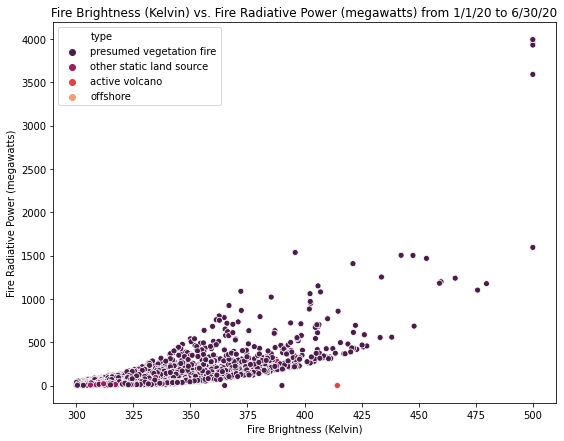

In [14]:
# graph for fire brightness vs. fire radiative power for archived data
plt.figure(figsize=(9, 7))
sns.scatterplot(x='brightness', y='frp', hue='type', data=archives, palette='rocket')
plt.title('Fire Brightness (Kelvin) vs. Fire Radiative Power (megawatts) from 1/1/20 to 6/30/20')
plt.ylabel('Fire Radiative Power (megawatts)')
plt.xlabel('Fire Brightness (Kelvin)');
#plt.savefig('archive_bright_vs_power.jpg')

**This graph shows that as Fire Radiative Power increases, fire brightness also increases**

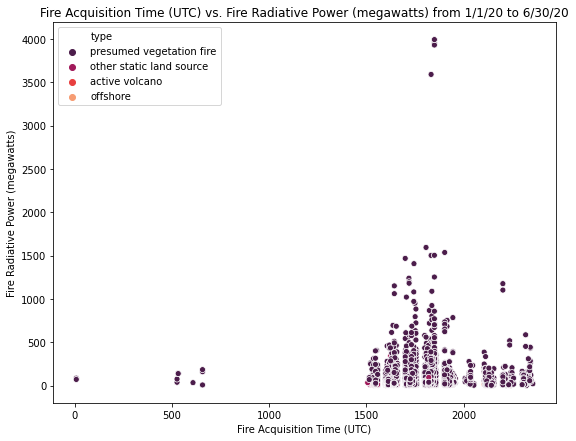

In [15]:
# graph for fire aquisition time vs. fire radiative power for archived data
plt.figure(figsize=(9, 7))
sns.scatterplot(x='acq_time', y='frp', hue='type', data=archives, palette='rocket')
plt.title('Fire Acquisition Time (UTC) vs. Fire Radiative Power (megawatts) from 1/1/20 to 6/30/20')
plt.ylabel('Fire Radiative Power (megawatts)')
plt.xlabel('Fire Acquisition Time (UTC)');
#plt.savefig('archive_acquisition_vs_power.jpg')

**This graphs shows that there may be a relationship between fire radiative power and acquision time of the data, more fires are identified between 1500 through 2000 UTC.**

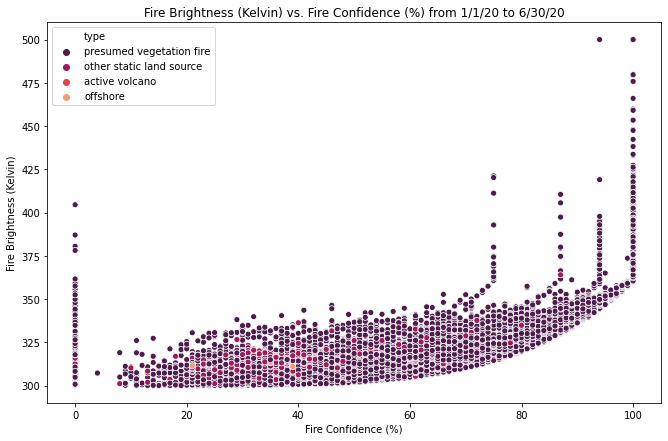

In [16]:
# graph for fire brightness vs. confidence for archived data
plt.figure(figsize=(11, 7))
sns.scatterplot(x='confidence', y='brightness', hue='type', data=archives, palette='rocket')
plt.title('Fire Brightness (Kelvin) vs. Fire Confidence (%) from 1/1/20 to 6/30/20')
plt.ylabel('Fire Brightness (Kelvin)')
plt.xlabel('Fire Confidence (%)');
#plt.savefig('archive_bright_vs_confidence.jpg')

**This graph shows that the brighter the fire, the more confident that a fire is present at that location (but can also lead to a higher false alarm rate)**

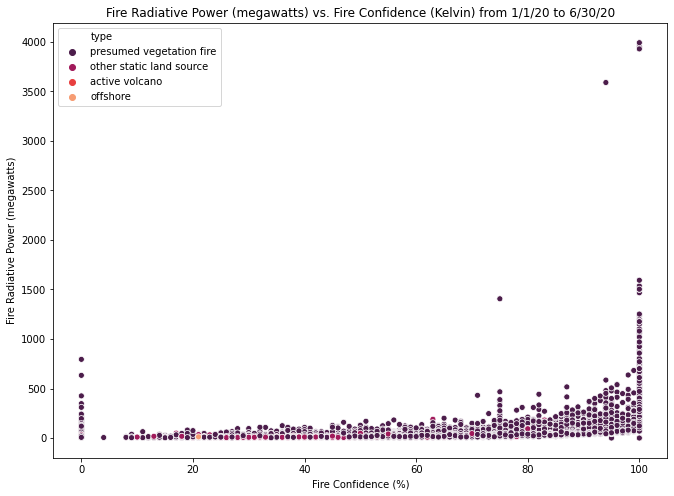

In [17]:
# graph for fire brightness vs. confidence for archived data
plt.figure(figsize=(11, 8))
sns.scatterplot(x='confidence', y='frp', hue='type', data=archives, palette='rocket')
plt.title('Fire Radiative Power (megawatts) vs. Fire Confidence (Kelvin) from 1/1/20 to 6/30/20')
plt.xlabel('Fire Confidence (%)')
plt.ylabel('Fire Radiative Power (megawatts)');
#plt.savefig('archive_confidence_vs_power.jpg')

**Looks like there may be a slight relationship between fire radiative power and confidence, those with more power seemed to illicit more condfidence as well, but only closer to the higher end of confidence**

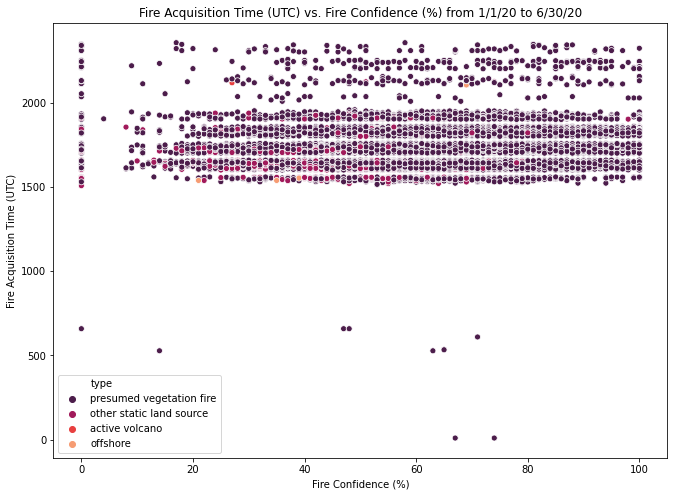

In [18]:
# graph for fire acquisition time vs. confidence for archived data
plt.figure(figsize=(11, 8))
sns.scatterplot(x='confidence', y='acq_time', hue='type', data=archives, palette='rocket')
plt.title('Fire Acquisition Time (UTC) vs. Fire Confidence (%) from 1/1/20 to 6/30/20')
plt.xlabel('Fire Confidence (%)')
plt.ylabel('Fire Acquisition Time (UTC)');
#plt.savefig('archive_confidence_vs_acquisition.jpg')

**Doesn't look to be a really strong relationship between confidence and acqusition time, other than more data being collected for times between 1500 through 2000**

In [19]:
# creating a combined data frame of archived and near real time data
full_year = pd.concat([archives, nrt], ignore_index=True)
full_year

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0       41.4810   -90.8294       310.0   1.0    1.0  2020-01-01      1704   
1       38.6973   -90.1281       311.7   1.1    1.0  2020-01-01      1705   
2       35.3007   -96.4107       306.6   1.2    1.1  2020-01-01      1706   
3       36.2370   -94.2750       300.5   1.0    1.0  2020-01-01      1706   
4       33.4832   -86.2691       301.5   2.1    1.4  2020-01-01      1706   
...         ...        ...         ...   ...    ...         ...       ...   
41704   36.2640  -105.3760       361.0   1.0    1.0  2020-10-23      1755   
41705   33.4160  -110.8670       318.7   1.4    1.2  2020-10-23      1755   
41706   40.5370  -123.8670       307.0   1.4    1.2  2020-10-23      1930   
41707   41.0200  -123.2890       302.2   1.4    1.2  2020-10-23      1930   
41708   39.6960  -121.9000       315.3   1.9    1.3  2020-10-23      1930   

      satellite instrument  confidence version  bright_t31   frp daynight  \
0         Terra      MODIS          69    6.03       276.5  13.8        D   
1         Terra      MODIS          54    6.03       282.3  14.1        D   
2         Terra      MODIS          60    6.03       280.8  13.4        D   
3         Terra      MODIS          38    6.03       282.2   6.0        D   
4         Terra      MODIS           0    6.03       275.8  22.9        D   
...         ...        ...         ...     ...         ...   ...      ...   
41704     Terra      MODIS         100  6.0NRT       290.9  86.2        D   
41705     Terra      MODIS          57  6.0NRT       306.2  10.7        D   
41706     Terra      MODIS          55  6.0NRT       297.0  10.0        D   
41707     Terra      MODIS          51  6.0NRT       289.3   8.5        D   
41708     Terra      MODIS          73  6.0NRT       298.1  25.4        D   

                           type  
0      presumed vegetation fire  
1      other static land source  
2      presumed vegetation fire  
3      presumed vegetation fire  
4      presumed vegetation fire  
...                         ...  
41704                       NaN  
41705                       NaN  
41706                       NaN  
41707                       NaN  
41708                       NaN  

[41709 rows x 15 columns]

In [20]:
full_year.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   41.4810   -90.8294       310.0   1.0    1.0  2020-01-01      1704   
1   38.6973   -90.1281       311.7   1.1    1.0  2020-01-01      1705   
2   35.3007   -96.4107       306.6   1.2    1.1  2020-01-01      1706   
3   36.2370   -94.2750       300.5   1.0    1.0  2020-01-01      1706   
4   33.4832   -86.2691       301.5   2.1    1.4  2020-01-01      1706   

  satellite instrument  confidence version  bright_t31   frp daynight  \
0     Terra      MODIS          69    6.03       276.5  13.8        D   
1     Terra      MODIS          54    6.03       282.3  14.1        D   
2     Terra      MODIS          60    6.03       280.8  13.4        D   
3     Terra      MODIS          38    6.03       282.2   6.0        D   
4     Terra      MODIS           0    6.03       275.8  22.9        D   

                       type  
0  presumed vegetation fire  
1  other static land source  
2  presumed vegetation fire  
3  presumed vegetation fire  
4  presumed vegetation fire

In [21]:
full_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41709 entries, 0 to 41708
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    41709 non-null  float64
 1   longitude   41709 non-null  float64
 2   brightness  41709 non-null  float64
 3   scan        41709 non-null  float64
 4   track       41709 non-null  float64
 5   acq_date    41709 non-null  object 
 6   acq_time    41709 non-null  int64  
 7   satellite   41709 non-null  object 
 8   instrument  41709 non-null  object 
 9   confidence  41709 non-null  int64  
 10  version     41709 non-null  object 
 11  bright_t31  41709 non-null  float64
 12  frp         41709 non-null  float64
 13  daynight    41709 non-null  object 
 14  type        17217 non-null  object 
dtypes: float64(7), int64(2), object(6)
memory usage: 4.8+ MB


**Type is missing a good amount of data. Will drop column from combined data set as type is only entered into archived data, not nrt data.**

In [22]:
full_year.drop(columns='type', inplace = True)

In [23]:
#full_year.to_csv('./modis-terra-day-full-year.csv')

In [24]:
# deciding not to make unnamed column = to the index 
full_year = pd.read_csv('./modis-terra-day-full-year.csv', index_col=0)

In [25]:
# it says that 'bright_t31' column has mized data, but since I won't be using it in analysis I'll leave it alone for now
full_year.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   41.4810   -90.8294       310.0   1.0    1.0  2020-01-01      1704   
1   38.6973   -90.1281       311.7   1.1    1.0  2020-01-01      1705   
2   35.3007   -96.4107       306.6   1.2    1.1  2020-01-01      1706   
3   36.2370   -94.2750       300.5   1.0    1.0  2020-01-01      1706   
4   33.4832   -86.2691       301.5   2.1    1.4  2020-01-01      1706   

  satellite instrument  confidence version  bright_t31   frp daynight  
0     Terra      MODIS          69    6.03       276.5  13.8        D  
1     Terra      MODIS          54    6.03       282.3  14.1        D  
2     Terra      MODIS          60    6.03       280.8  13.4        D  
3     Terra      MODIS          38    6.03       282.2   6.0        D  
4     Terra      MODIS           0    6.03       275.8  22.9        D

In [26]:
full_year.tail()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
41704    36.264   -105.376       361.0   1.0    1.0  2020-10-23      1755   
41705    33.416   -110.867       318.7   1.4    1.2  2020-10-23      1755   
41706    40.537   -123.867       307.0   1.4    1.2  2020-10-23      1930   
41707    41.020   -123.289       302.2   1.4    1.2  2020-10-23      1930   
41708    39.696   -121.900       315.3   1.9    1.3  2020-10-23      1930   

      satellite instrument  confidence version  bright_t31   frp daynight  
41704     Terra      MODIS         100  6.0NRT       290.9  86.2        D  
41705     Terra      MODIS          57  6.0NRT       306.2  10.7        D  
41706     Terra      MODIS          55  6.0NRT       297.0  10.0        D  
41707     Terra      MODIS          51  6.0NRT       289.3   8.5        D  
41708     Terra      MODIS          73  6.0NRT       298.1  25.4        D

In [27]:
full_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41709 entries, 0 to 41708
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    41709 non-null  float64
 1   longitude   41709 non-null  float64
 2   brightness  41709 non-null  float64
 3   scan        41709 non-null  float64
 4   track       41709 non-null  float64
 5   acq_date    41709 non-null  object 
 6   acq_time    41709 non-null  int64  
 7   satellite   41709 non-null  object 
 8   instrument  41709 non-null  object 
 9   confidence  41709 non-null  int64  
 10  version     41709 non-null  object 
 11  bright_t31  41709 non-null  float64
 12  frp         41709 non-null  float64
 13  daynight    41709 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 4.8+ MB


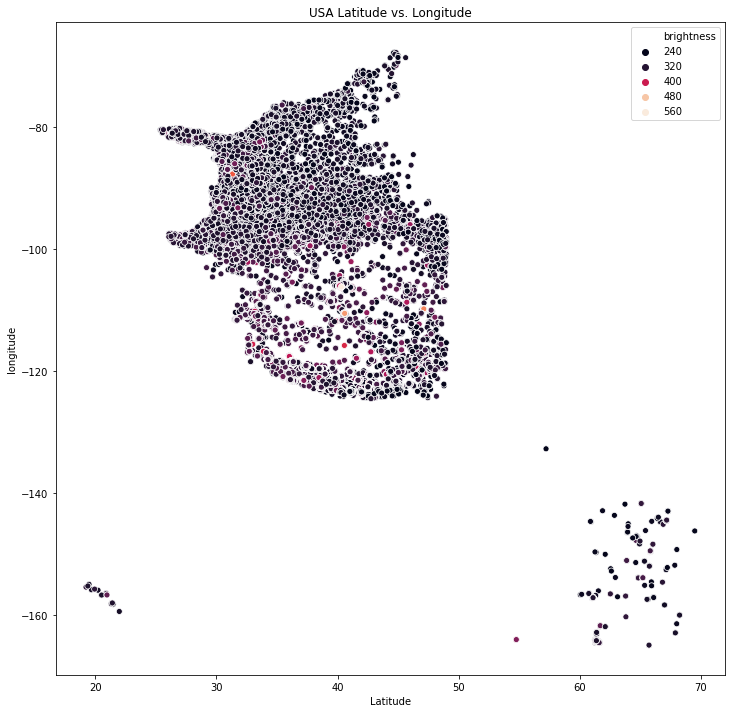

In [29]:
# graph of the latitude vs. longitude for the continental US, hawaii and alaska
plt.figure(figsize=(12, 12))
sns.scatterplot(full_year['latitude'], full_year['longitude'], hue=full_year['brightness'], palette='rocket')
plt.title('USA Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('longitude');
#plt.savefig('full_lat_vs_long.jpg')

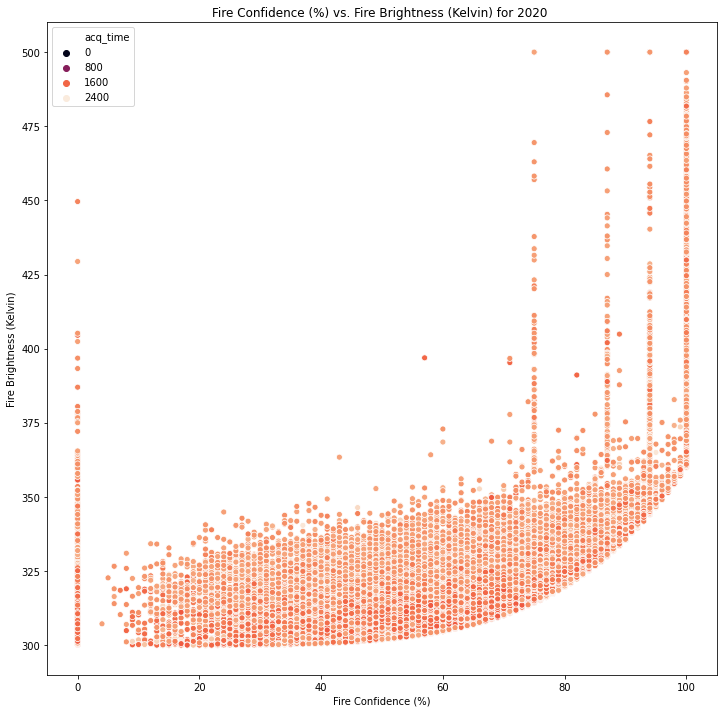

In [30]:
# graph looking at confidence vs. brightness in the combined data set
plt.figure(figsize=(12, 12))
sns.scatterplot(data=full_year, x='confidence', y='brightness', hue='acq_time', palette='rocket')
plt.title('Fire Confidence (%) vs. Fire Brightness (Kelvin) for 2020 ')
plt.ylabel('Fire Brightness (Kelvin)')
plt.xlabel('Fire Confidence (%)');
#plt.savefig('full_con_vs_bright.jpg')

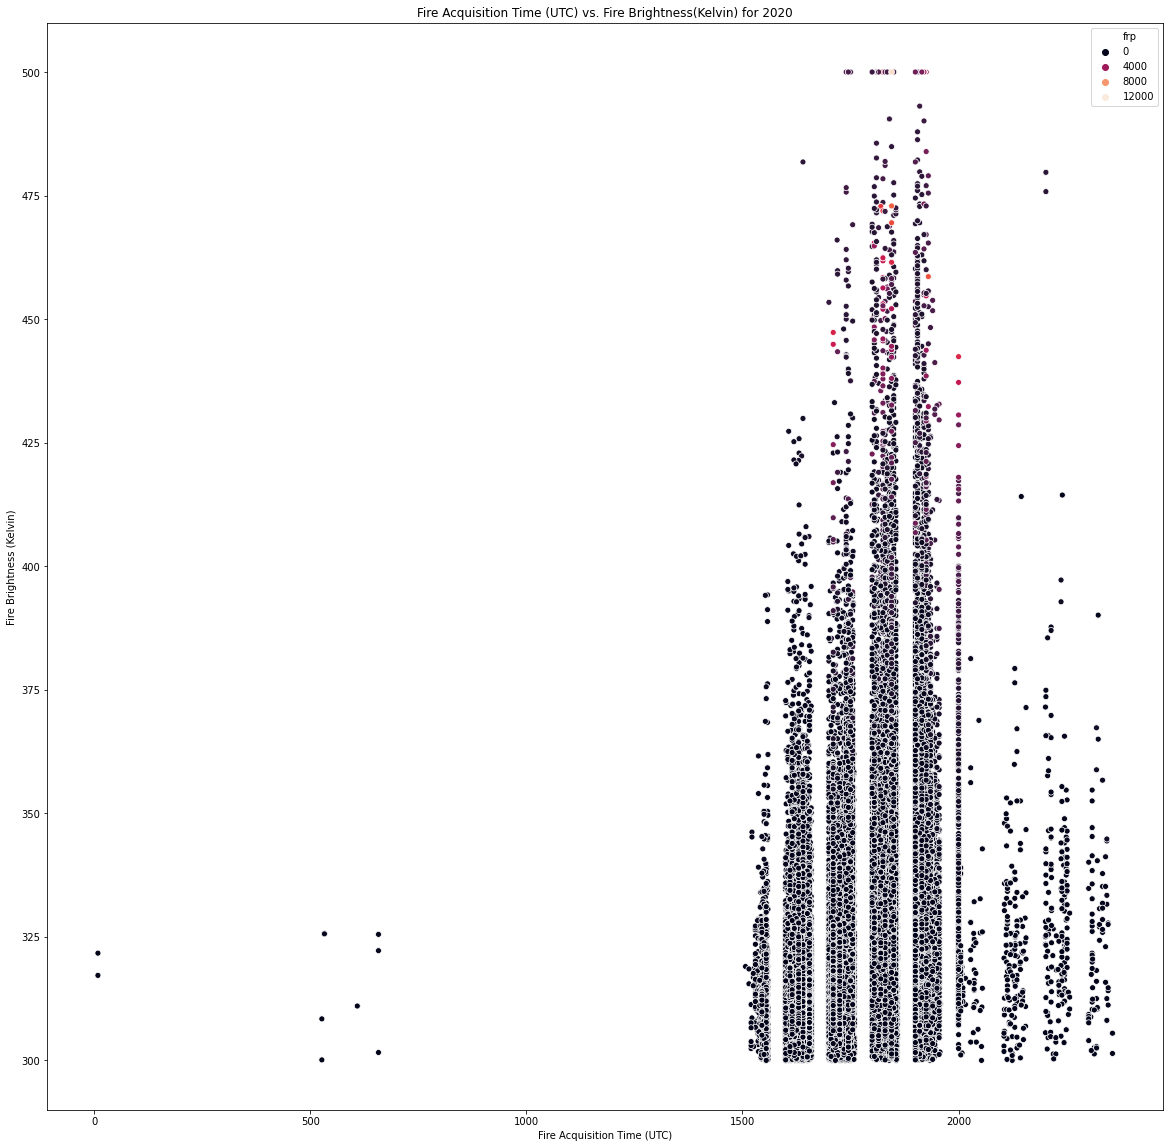

In [31]:
# graph looking at acquisition time vs. brightness in the combined data set
plt.figure(figsize=(20, 20))
sns.scatterplot(data=full_year, x='acq_time', y='brightness', hue='frp', palette='rocket')
plt.title('Fire Acquisition Time (UTC) vs. Fire Brightness(Kelvin) for 2020')
plt.ylabel('Fire Brightness (Kelvin)')
plt.xlabel('Fire Acquisition Time (UTC)');
#plt.savefig('full_acq_vs_bright.jpg')

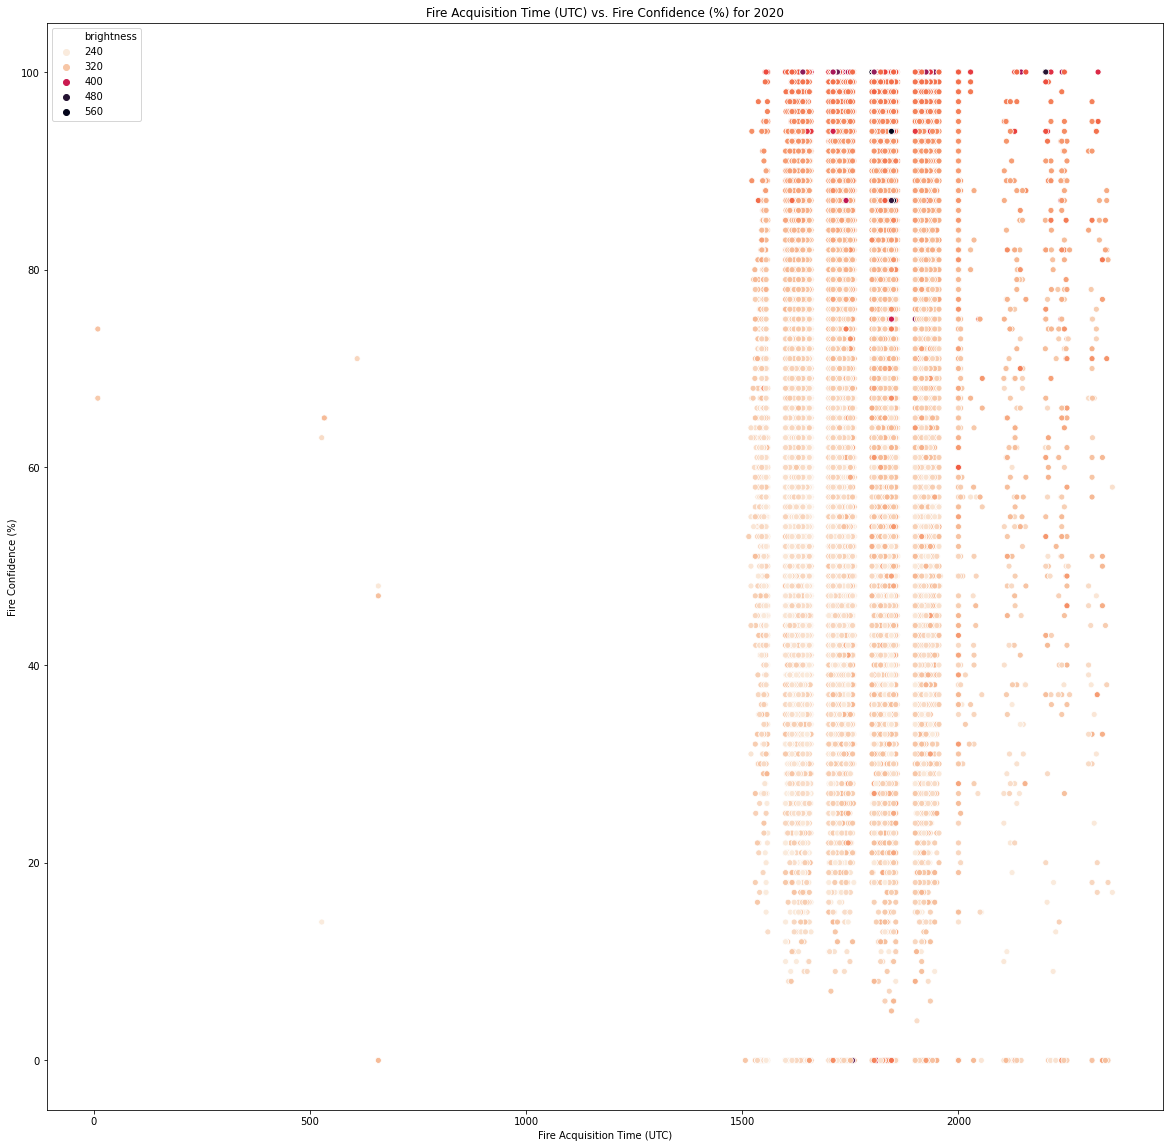

In [32]:
# graph looking at acquisition time vs. Confidence in the combined data set
plt.figure(figsize=(20, 20))
sns.scatterplot(data=full_year, x='acq_time', y='confidence', hue='brightness', palette='rocket_r')
plt.title('Fire Acquisition Time (UTC) vs. Fire Confidence (%) for 2020')
plt.ylabel('Fire Confidence (%)')
plt.xlabel('Fire Acquisition Time (UTC)');
#plt.savefig('full_acq_vs_conf.jpg')

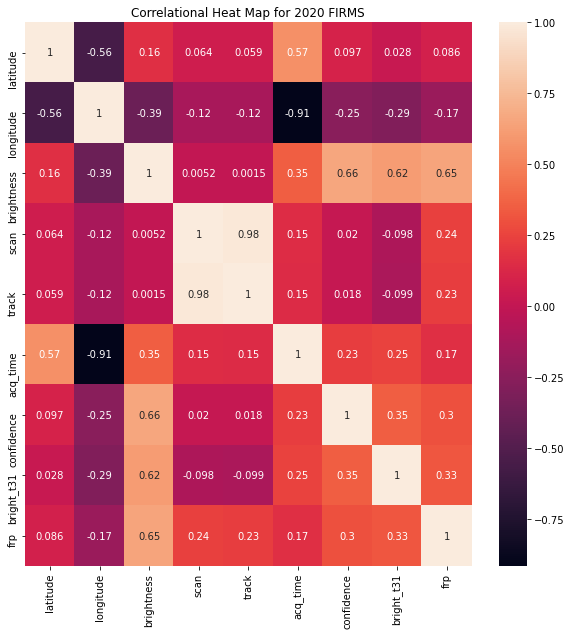

In [33]:
# Correlational heat map
plt.figure(figsize=(10, 10))
sns.heatmap(full_year.corr(), annot=True)
plt.title('Correlational Heat Map for 2020 FIRMS');

- acqusition time and longitude are the most highly correlated (understandable since data is collected from a satellite that travel arounds the earth)
- brightness and fire radiative power are highly correlated
- brightness and confidence are highly correlated
- since brightness data collected from MODIS channel 31 isn't very correlated with fire radiative power, won't use it as the weight for my heat map with time

In [35]:
# turning acquisition date to datetime so I can easily filter out certain dates
full_year['acq_date'] = pd.to_datetime(full_year['acq_date'])

In [43]:
# since we only have COVID data for our mapping software starting from 2/19/20 and up until 10/20/20 
# then I will filter out those dates from the data I will use for the heat map
full_year = full_year[(full_year['acq_date'] >= '2020-02-19') & (full_year['acq_date'] <= '2020-10-20')]

In [54]:
# creating a dataframe for June 14th to highlight it
june14 = archives[archives['acq_date'] == '2020-06-14']

In [1]:
def lat_long_map(latitude, longitude):
    ''' Function to create a folium map with red fire icons
    Parameters
    -----------
    latitude: can be a list or a single float value representing latitude
    longitude: can be a list or a single float value representing longitude
        Note: latitude and longitude formats must match up for the function to run
    tooltip: str or list
        Display a text when hovering over the object.
        
    '''
    # create a folium map
    fire_map = folium.Map(tiles='Stamen Terrain')
    
    # add fire markers
    for lat, long in zip(latitude, longitude):
        folium.Marker(location=[lat, long], icon=folium.Icon(icon='fire', color='red'), tooltip=[lat, long]).add_to(fire_map)
    return fire_map

In [65]:
lat_long_map(june14['latitude'], june14['longitude'])

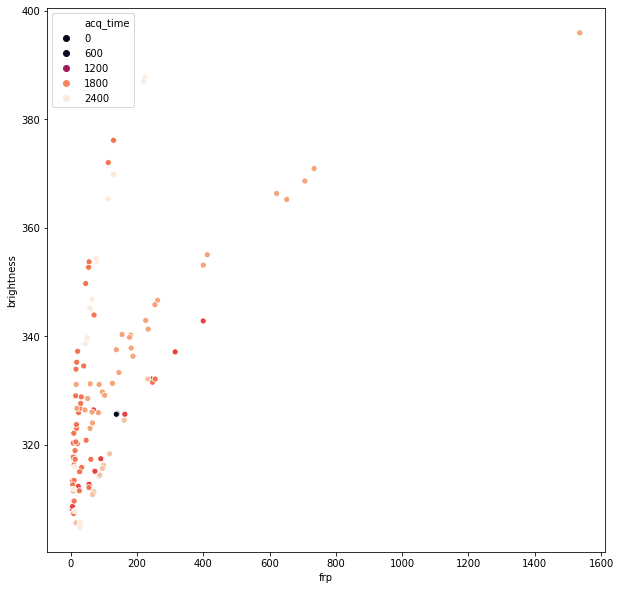

In [57]:
plt.figure(figsize=(10, 10))
sns.scatterplot(june14['frp'], june14['brightness'], hue=june14['acq_time'], palette='rocket');

In [58]:
june14['type'].value_counts()

presumed vegetation fire    105
other static land source      8
Name: type, dtype: int64

In [52]:
full_year.groupby('acq_date').count().sort_values(by='brightness', ascending=False).head()

latitude  longitude  brightness  scan  track  acq_time  satellite  \
acq_date                                                                        
2020-09-09      1285       1285        1285  1285   1285      1285       1285   
2020-09-08      1085       1085        1085  1085   1085      1085       1085   
2020-09-07       926        926         926   926    926       926        926   
2020-08-19       918        918         918   918    918       918        918   
2020-09-16       655        655         655   655    655       655        655   

            instrument  confidence  version  bright_t31   frp  daynight  
acq_date                                                                 
2020-09-09        1285        1285     1285        1285  1285      1285  
2020-09-08        1085        1085     1085        1085  1085      1085  
2020-09-07         926         926      926         926   926       926  
2020-08-19         918         918      918         918   918       918  
2020-09-16         655         655      655         655   655       655

In [68]:
# turning acquisition date back into a string so it's formatted correctly for the heat map
full_year['acq_date'] = full_year['acq_date'].astype(str)

<ipython-input-68-a166c4a863d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_year['acq_date'] = full_year['acq_date'].astype(str)


In [69]:
# converted brightness to be on a scale of zero to one (format needed for HeatMapWithTime)
# normalization equation from https://docs.tibco.com/pub/spotfire/7.0.0/doc/html/norm/norm_scale_between_0_and_1.htm
full_year['brightness'] = (full_year['brightness'] - full_year['brightness'].min()) / (full_year['brightness'].max() - full_year['brightness'].min())

# converted frp (fire radiative power) to be on a scale of zero to one (format needed for HeatMapWithTime)
full_year['frp'] = (full_year['frp'] - full_year['frp'].min()) / (full_year['frp'].max() - full_year['frp'].min())

# sorted acq_date
full_year['acq_date'] = full_year['acq_date'].sort_values(ascending=True)

<ipython-input-69-ba3a8b0f3b26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_year['brightness'] = (full_year['brightness'] - full_year['brightness'].min()) / (full_year['brightness'].max() - full_year['brightness'].min())
<ipython-input-69-ba3a8b0f3b26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_year['frp'] = (full_year['frp'] - full_year['frp'].min()) / (full_year['frp'].max() - full_year['frp'].min())
<ipython-input-69-ba3a8b0f3b26>:9: SettingWithCopyWarning: 
A value is trying to be s

In [70]:
# created a list that groups latitude, longitude and brightness (as the weight) by acquisition date
data_bright = []
for _, d in full_year.groupby('acq_date'):
    data_bright.append([[row['latitude'], row['longitude'], row['brightness']] for _, row in d.iterrows()])

In [71]:
# created a time index for heatmap
time_index = [k[0] for k in full_year.groupby('acq_date')]

In [78]:
# putting it all together for brightness

# creating a map
m_bright = folium.Map(location=[48, -102], zoom_start = 3) 


# creating heat map with time
hm_bright = HeatMapWithTime(data_bright, index= time_index, name = 'Heat Map', auto_play=False, min_opacity=0.4, radius=5)

# layering heat map with time onto empty map
hm_bright.add_to(m_bright)

folium.LayerControl().add_to(m_bright) 


m_bright

Next steps: add a layer onto the map with COVID-19 cases across the US over the same time period

In [74]:
# created a list that groups latitude, longitude and fire radiative power (as the weight) by acquisition date
data_power = []
for _, d in full_year.groupby('acq_date'):
    data_power.append([[row['latitude'], row['longitude'], row['brightness']] for _, row in d.iterrows()])

In [77]:
# putting it all together for radiative power

# creating a map
m_power = folium.Map(location=[48, -102], zoom_start = 3) 


# creating heat map with time
hm_power = HeatMapWithTime(data_power, index= time_index, name = 'Heat Map', auto_play=False, min_opacity=0.4, radius=5)

# layering heat map with time onto empty map
hm_power.add_to(m_power)

folium.LayerControl().add_to(m_power) 


m_power